In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [24]:
data=pd.read_csv("emails.csv")

In [25]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [26]:
data = data.drop(["Email No."],axis=1)
data.dropna(axis=0,inplace=True)

In [27]:
data.shape

(5172, 3001)

In [28]:
data.isnull().sum()


the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [29]:
X = data.drop(columns= ['Prediction'])
y = data['Prediction']

In [30]:

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:


knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print("-------knn----------")
print("accuracy: ", accuracy_score(y_test,knn_pred))
print("confusion matrix: \n", confusion_matrix(y_test,knn_pred))
print("classification report: \n", classification_report(y_test,knn_pred))

-------knn----------
accuracy:  0.8628019323671497
confusion matrix: 
 [[646  93]
 [ 49 247]]
classification report: 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.83      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.85      0.84      1035
weighted avg       0.87      0.86      0.87      1035



In [32]:

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print("-------svm----------")
print("accuracy: ", accuracy_score(y_test,svm_pred))
print("confusion matrix: \n", confusion_matrix(y_test,svm_pred))
print("classification report: \n", classification_report(y_test,svm_pred))

-------svm----------
accuracy:  0.9594202898550724
confusion matrix: 
 [[715  24]
 [ 18 278]]
classification report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



KNN Accuracy: 0.8628019323671497
SVM Accuracy: 0.9594202898550724


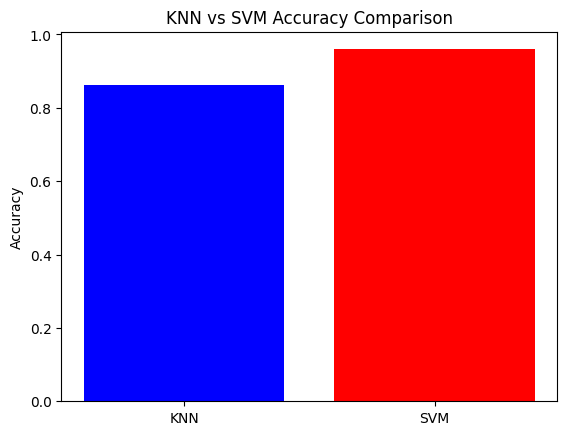

In [33]:
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Bar plot comparison
acc_knn = accuracy_score(y_test, knn_pred)
acc_svm = accuracy_score(y_test, svm_pred)

plt.bar(['KNN', 'SVM'], [acc_knn, acc_svm], color=['blue', 'red'])
plt.ylabel("Accuracy")
plt.title("KNN vs SVM Accuracy Comparison")
plt.show()
